In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
dir_path = "gdrive/My Drive/dataset"

import os
for dirname, _, filenames in os.walk(dir_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

gdrive/My Drive/dataset/amer_sign2.png
gdrive/My Drive/dataset/amer_sign3.png
gdrive/My Drive/dataset/sign_mnist_test.csv
gdrive/My Drive/dataset/sign_mnist_train.csv
gdrive/My Drive/dataset/sign_mnist_train/sign_mnist_train.csv
gdrive/My Drive/dataset/sign_mnist_test/sign_mnist_test.csv


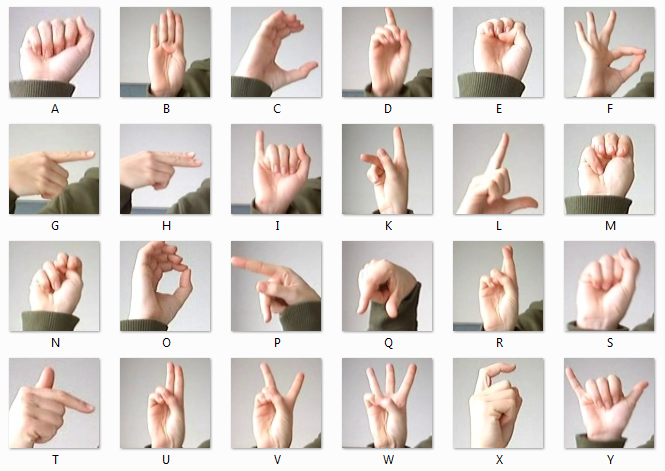

In [4]:
from IPython.display import Image
Image('gdrive/My Drive/dataset/amer_sign2.png')

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

train = pd.read_csv('/Users/lakshaygupta/Desktop/archive/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/Users/lakshaygupta/Desktop/archive/sign_mnist_test/sign_mnist_test.csv')

print(train.shape)
print(test.shape)

train.head()

(27455, 785)
(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


(-0.5, 27.5, 27.5, -0.5)

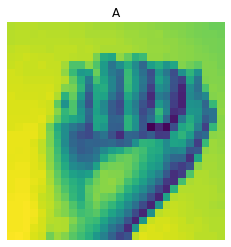

In [2]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

#See a random image for class label verification
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 
# plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

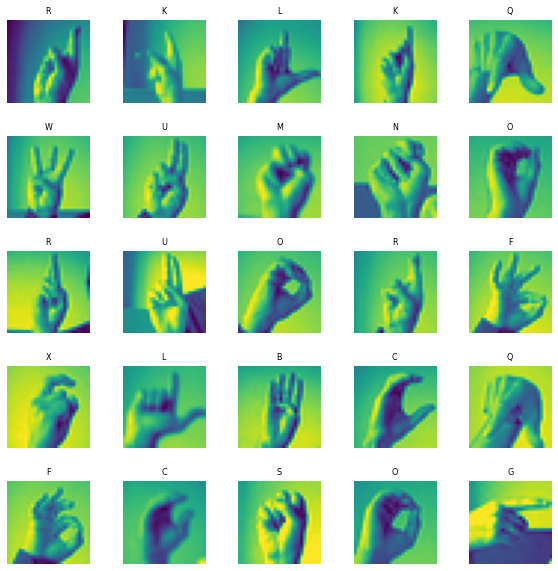

In [3]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)


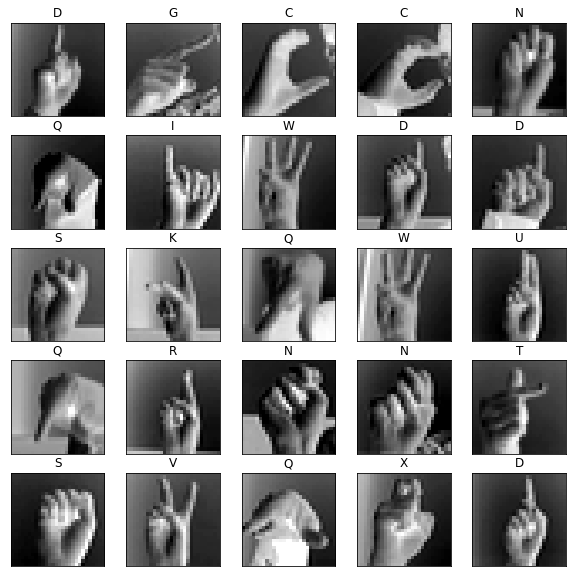

In [4]:
#Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [5]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

print(X_train.shape)
print(y_train.shape)

# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 784)
(21964,)
(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import adam_v2
from keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))

#CNN Model Summary
cnn_model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-04-25 19:24:55.239262: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-25 19:24:55.239546: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

Epoch 1/50


2022-04-25 19:25:06.358769: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-25 19:25:06.692162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - ETA: 0s - loss: 3.1650 - accuracy: 0.0594

2022-04-25 19:25:10.624035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 4s 60ms/step - loss: 3.1650 - accuracy: 0.0594 - val_loss: 3.0201 - val_accuracy: 0.1422
Epoch 2/50
43/43 [==============================] - 2s 51ms/step - loss: 2.5830 - accuracy: 0.1956 - val_loss: 1.9806 - val_accuracy: 0.4052
Epoch 3/50
43/43 [==============================] - 2s 55ms/step - loss: 1.7981 - accuracy: 0.4030 - val_loss: 1.3152 - val_accuracy: 0.6021
Epoch 4/50
43/43 [==============================] - 2s 49ms/step - loss: 1.2912 - accuracy: 0.5651 - val_loss: 0.8953 - val_accuracy: 0.7237
Epoch 5/50
43/43 [==============================] - 2s 49ms/step - loss: 0.9858 - accuracy: 0.6621 - val_loss: 0.6541 - val_accuracy: 0.8113
Epoch 6/50
43/43 [==============================] - 2s 48ms/step - loss: 0.7906 - accuracy: 0.7281 - val_loss: 0.4773 - val_accuracy: 0.8649
Epoch 7/50
43/43 [==============================] - 2s 54ms/step - loss: 0.6401 - accuracy: 0.7795 - val_loss: 0.3687 - val_accuracy: 0.9022
Epoch 8/50
43/43 [======

Text(0.5, 1.0, 'Accuracy evolution')

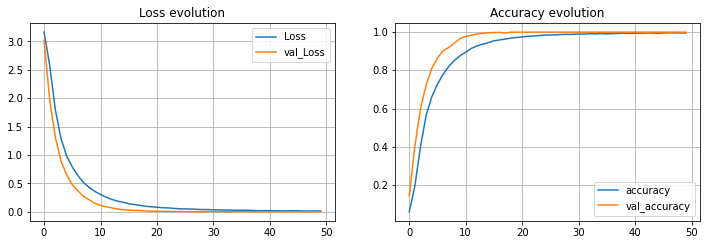

In [7]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 50, verbose = 1, validation_data = (X_validate, y_validate))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

2022-04-25 19:27:00.161171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


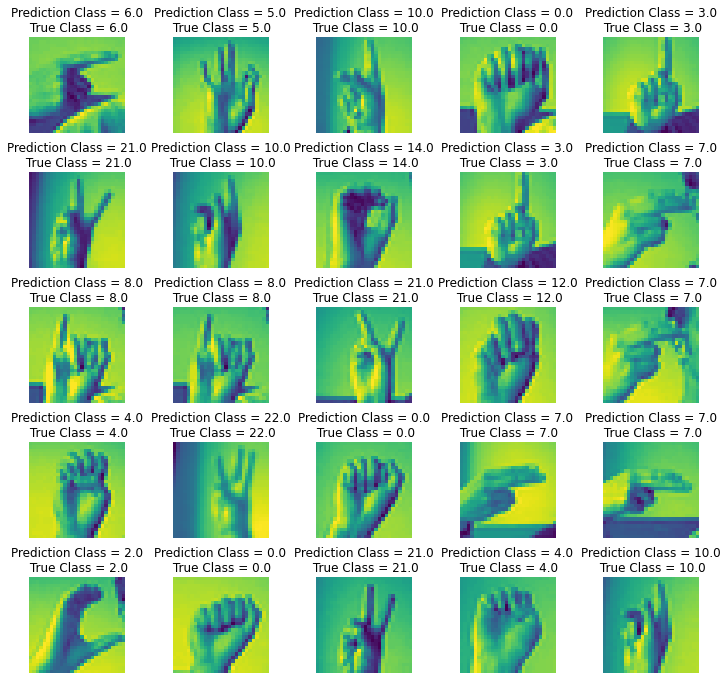

In [8]:
#Predictions for the test data
predict_x = cnn_model.predict(X_test)
predicted_classes = np.argmax(predict_x,axis=1)
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    pred_index = int(predicted_classes[i])
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

Confusion matrix, without normalization


ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of ticklabels (25).

<Figure size 1440x1440 with 0 Axes>

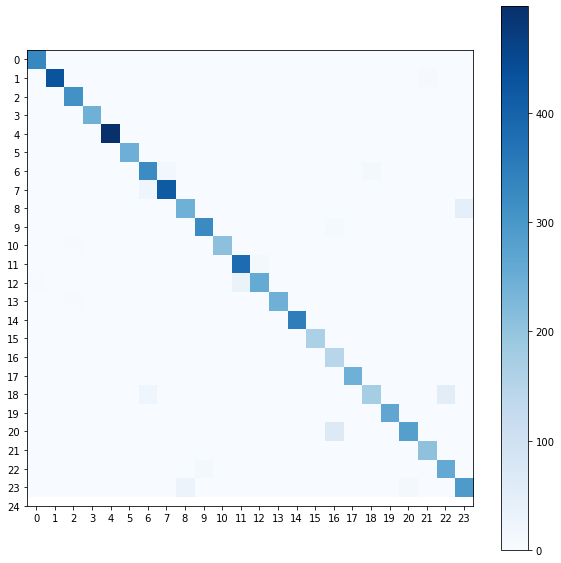

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted_classes)

#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Computing confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

# Visualizing
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

   # Rotating the tick labels and setting their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Looping over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)

#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

#Confusion Matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(y_test, predicted_classes, classes = class_names, title='Confusion matrix')
plt.show()

In [ ]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)

In [ ]:
from keras.preprocessing import image

test_img = image.load_img('gdrive/My Drive/Colab Notebooks/test14.jpeg',target_size=(28,28),color_mode='grayscale')
plt.imshow(test_img)
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)

predict_out = cnn_model.predict(test_img)
predicted_classes = np.argmax(predict_out,axis=1)

pred_idx = predicted_classes[0]
print(f"Prediction Class = {class_names[int(predicted_classes[0])]}")
# cnn_model.save('model.h5')

# loaded_model = keras.models.load_model('model.h5')

# result = cnn_model.predict



In [ ]:
import cv2
from google.colab.patches import cv2_imshow
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    
    # Display the resulting frame
    cv2_imshow()
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

error: ignored